# Task 1

Please train a model to predict the results of matches in test.csv. The output format is the sample in sample_submission.csv

## Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Data Explore</h2>

<h4>Loading train.csv by using pandas</h4>

In [2]:
df = pd.read_csv("./train.csv")

/var/folders/r8/__hqjl2n5j5_wf6w5j15gn300000gn/T/ipykernel_20098/1547526635.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./train.csv")


<h4>Check the number of fields and columns</h4>

In [3]:
df.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


<h4>Check the number of the rows</h4>

In [4]:
len(list(set(df['home_team_name'])))

9814

In [5]:
df.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
count,1.109380e+05,110938.000000,8.921700e+04,8.912300e+04,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,...,109712.000000,108345.000000,106904.000000,105422.000000,103938.000000,102512.000000,101071.000000,99643.000000,98176.000000,96722.000000
mean,1.519875e+07,910.457012,1.287134e+07,1.291552e+07,0.306944,0.567801,0.466141,0.519469,0.487857,0.507288,...,901.986200,894.389137,886.368012,878.243611,869.450297,861.901455,853.435338,844.673223,837.678200,829.177374
std,2.536393e+06,549.120985,1.578479e+07,1.580344e+07,0.461228,0.495384,0.498855,0.499623,0.499855,0.499949,...,545.826707,542.247411,538.497274,534.864981,531.170701,527.338931,524.217968,520.954647,517.647869,514.900676
min,1.142829e+07,2.000000,2.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.200038e+07,444.000000,4.596120e+05,4.595650e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,438.000000,432.000000,426.000000,420.000000,417.000000,408.000000,399.000000,391.500000,387.000000,387.000000
50%,1.675988e+07,947.000000,1.552728e+06,1.552806e+06,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,944.000000,935.000000,906.500000,899.000000,884.000000,881.000000,860.000000,830.000000,821.000000,806.000000
75%,1.724230e+07,1293.000000,3.243116e+07,3.279539e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1286.000000,1283.000000,1279.000000,1274.000000,1270.000000,1267.000000,1265.000000,1263.000000,1261.000000,1255.000000
max,1.805384e+07,2039.000000,3.756849e+07,3.756847e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2028.000000,2025.000000


<h4>Check any miss values</h4>

In [6]:
missval_cols= df.columns[df.isnull().any()].tolist()
missval_cols

['home_team_name',
 'away_team_name',
 'league_name',
 'is_cup',
 'home_team_coach_id',
 'away_team_coach_id',
 'home_team_history_match_date_1',
 'home_team_history_match_date_2',
 'home_team_history_match_date_3',
 'home_team_history_match_date_4',
 'home_team_history_match_date_5',
 'home_team_history_match_date_6',
 'home_team_history_match_date_7',
 'home_team_history_match_date_8',
 'home_team_history_match_date_9',
 'home_team_history_match_date_10',
 'home_team_history_is_play_home_1',
 'home_team_history_is_play_home_2',
 'home_team_history_is_play_home_3',
 'home_team_history_is_play_home_4',
 'home_team_history_is_play_home_5',
 'home_team_history_is_play_home_6',
 'home_team_history_is_play_home_7',
 'home_team_history_is_play_home_8',
 'home_team_history_is_play_home_9',
 'home_team_history_is_play_home_10',
 'home_team_history_is_cup_1',
 'home_team_history_is_cup_2',
 'home_team_history_is_cup_3',
 'home_team_history_is_cup_4',
 'home_team_history_is_cup_5',
 'home_team_

<h4>Drop missed values</h4>

In [ ]:
for i in range(len(missval_cols)):
    update_df = df.drop(df.index[df[df[missval_cols[i]].isnull()].index.tolist()])
update_df.head()

<h4>Visualize the distribution of "Target" including: "Home", "Draw", "Away"</h4>

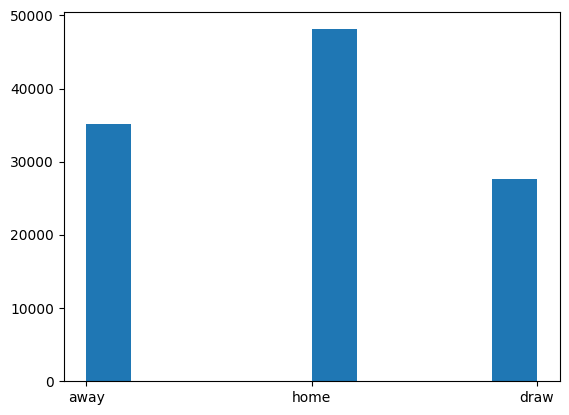

In [8]:
plt.hist(df['target'])
plt.show()

<h4>Loading sample_submission.csv for checking the structure</h4>

In [ ]:
sample_submission = pd.read_csv("./sample_submission.csv")
sample_submission.head()

<h4>Loading train_target_and_score.csv for checking the structure</h4>

In [ ]:
train_test_score = pd.read_csv("./train_target_and_scores.csv")
train_test_score.head()

<h4>Loading test.csv for checking the structure</h4>

In [9]:
df_test = pd.read_csv("./test.csv")
df_test.head()

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,team home,team away,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,team home,team away,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,21036670.0,1553238.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,3618158.0,37400444.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0


I realize that the test data doesn't names for have_team_name & away_team_name like train data and target column, then I decide to drop these column for training/ testing. I will use columns such as features training (about 187 columns)

In [11]:
update_df_ = df.copy()
update_df_.drop(['home_team_name', 'away_team_name','target','id'], axis='columns',inplace=True)
update_df_.head()

,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,2019-11-03 21:30:00,2019-10-27 01:00:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,2019-11-23 03:10:00,2019-11-10 03:00:00,2019-11-04 02:00:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,2019-11-24 01:00:00,2019-11-10 02:00:00,2019-11-03 01:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [12]:
#features = ["id", "home_team_name", "away_team_name", "league_name"]
#X = df[features]
X = update_df_.copy()

In [14]:
y = df['target']
y.head()

0    away
1    home
2    draw
3    away
4    home
Name: target, dtype: object

In [15]:
X.head()

,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,2019-11-03 21:30:00,2019-10-27 01:00:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,2019-11-23 03:10:00,2019-11-10 03:00:00,2019-11-04 02:00:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,2019-11-24 01:00:00,2019-11-10 02:00:00,2019-11-03 01:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


<h2>Data Preprocess</h2>

In [16]:
import random
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

<h3>Handling Categorical Values</h3>

<h4>Data preprocess for train data (train.csv)</h4>

In [17]:
le = preprocessing.LabelEncoder()
y_le= le.fit(y)
y_le_trans = y_le.transform(y)
y_le_trans

array([0, 2, 1, ..., 1, 0, 2])

In [18]:
schema_features= list(X.columns)
for i in schema_features:
    X_le = le.fit(X[i])
    X[i] = X_le.transform(X[i])

#### Data preprocess for test data (test.csv)

In [19]:
df_test_ = df_test.copy()
df_test_.drop(['home_team_name', 'away_team_name','id'], axis='columns',inplace=True)
X_test = df_test_.copy()
X_test.head()

,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,2021-04-23 23:00:00,2021-04-21 00:30:00,2021-04-17 00:15:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,2021-04-17 00:30:00,2021-04-10 00:30:00,2021-04-04 01:00:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,2021-04-24 23:00:00,2021-04-22 23:00:00,2021-04-21 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,2021-05-01 01:00:00,Paulista A2,1314,False,21036670.0,1553238.0,2021-04-29 01:00:00,2021-04-24 23:00:00,2021-04-23 01:00:00,2021-04-21 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,2021-05-01 01:00:00,Paulista A2,1314,False,3618158.0,37400444.0,2021-04-29 01:00:00,2021-04-24 23:00:00,2021-04-22 23:00:00,2021-04-20 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0


In [20]:
schema_features= list(X_test.columns)
for i in schema_features:
    X_le = le.fit(X_test[i])
    X_test[i] = X_le.transform(X_test[i])

Splitting train data into train and validation data.

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y_le_trans, train_size=0.7, random_state=42)
X_train.shape, X_val.shape

((77656, 186), (33282, 186))

<h3>Building Machine learning model (RandomForestClassifier)</h3>

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=1, max_depth=5, n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

y_pred_train = classifier_rf.predict(X_train)
y_pred_val = classifier_rf.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred_val)

<h3>Result Evaluation</h3>

In [23]:
print("Confusion Matrix \n",confusion_matrix(y_val,y_pred_val))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_val,y_pred_val))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[ 2492     0  8095]
 [ 1120     0  7190]
 [ 1005     0 13380]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.54      0.24      0.33     10587
           1       0.00      0.00      0.00      8310
           2       0.47      0.93      0.62     14385

    accuracy                           0.48     33282
   macro avg       0.34      0.39      0.32     33282
weighted avg       0.37      0.48      0.37     33282



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.4768944174028003


/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

<h3>Fine Tuning the model to find the best parameter for RandomForestClassifier</h3>

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [25]:
grid_search.best_score_

0.495377047491501

In [26]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=1, oob_score=True, random_state=42)

In [27]:
classifier_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=1, oob_score=True, random_state=42)
classifier_rf.fit(X_train, y_train)
y_pred_train = classifier_rf.predict(X_train)
y_pred_val = classifier_rf.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred_val)

In [28]:
print("Confusion Matrix \n",confusion_matrix(y_val,y_pred_val))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_val,y_pred_val))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[ 4397   100  6090]
 [ 2245   110  5955]
 [ 2489   112 11784]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.48      0.42      0.45     10587
           1       0.34      0.01      0.03      8310
           2       0.49      0.82      0.62     14385

    accuracy                           0.49     33282
   macro avg       0.44      0.42      0.36     33282
weighted avg       0.45      0.49      0.41     33282



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.48948380505979205


<h2>Predicting the probabilities for "Home"/ "Draw"/ "Away"</h2>

In [29]:
output = classifier_rf.predict_proba(X_test)
output.shape

(72711, 3)

In [36]:
output = np.round(output,decimals=2)

In [38]:
output_ = pd.DataFrame(output, columns=["Home","Draw","Away"])

In [39]:
output_

,Home,Draw,Away
0,0.27,0.30,0.43
1,0.33,0.30,0.37
2,0.32,0.30,0.38
3,0.37,0.31,0.32
4,0.23,0.31,0.46
...,...,...,...
72706,0.23,0.34,0.43
72707,0.20,0.31,0.50
72708,0.36,0.30,0.34
72709,0.21,0.25,0.54


In [40]:
output_to_csv = pd.concat([df_test['id'], output_],axis=1).to_csv("./Task1_RandomForest_submission.csv")

In [35]:
output_to_csv

## Apply HistGradientBoostingClassifier

In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier
classifier_hgb = HistGradientBoostingClassifier(random_state=42, max_depth=5)
                                    
classifier_hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(max_depth=5, random_state=42)

In [42]:
y_pred_train = classifier_hgb.predict(X_train)
y_pred_val = classifier_hgb.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred_val)

In [43]:
print("Confusion Matrix \n",confusion_matrix(y_val,y_pred_val))
print("\n")
print("<-------------------Classification Report---------------------->\n") 
print(classification_report(y_val,y_pred_val))
print("\n")
print("<---------------Accuracy Scores------------------->\n") #print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[ 4934   275  5378]
 [ 2627   253  5430]
 [ 2842   322 11221]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.47      0.47      0.47     10587
           1       0.30      0.03      0.06      8310
           2       0.51      0.78      0.62     14385

    accuracy                           0.49     33282
   macro avg       0.43      0.43      0.38     33282
weighted avg       0.45      0.49      0.43     33282



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.4929992187969473


In [44]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_hgb,
                           param_grid=params,verbose=1, scoring="accuracy")

In [45]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=HistGradientBoostingClassifier(max_depth=5,
                                                      random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [46]:
grid_search.best_score_

0.49739874922714034

In [47]:
rf_best = grid_search.best_estimator_
rf_best

HistGradientBoostingClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [48]:
classifier_hgb = HistGradientBoostingClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

                                    
classifier_hgb.fit(X_train, y_train)
y_pred_train = classifier_hgb.predict(X_train)
y_pred_val = classifier_hgb.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred_val)

In [49]:
print("Confusion Matrix \n",confusion_matrix(y_val,y_pred_val))
print("\n")
print("<-------------------Classification Report---------------------->\n") 
print(classification_report(y_val,y_pred_val))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[ 4952   189  5446]
 [ 2582   179  5549]
 [ 2875   206 11304]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.48      0.47      0.47     10587
           1       0.31      0.02      0.04      8310
           2       0.51      0.79      0.62     14385

    accuracy                           0.49     33282
   macro avg       0.43      0.43      0.38     33282
weighted avg       0.45      0.49      0.43     33282



<---------------Accuracy Scores------------------->

Test Accuracy score: 0.4938104681209062


In [50]:
output = classifier_hgb.predict_proba(X_test)
output.shape

(72711, 3)

In [51]:
output = np.round(output,decimals=2)

In [52]:
output_ = pd.DataFrame(output, columns=["Home","Draw","Away"])

In [53]:
output_to_csv = pd.concat([df_test['id'], output_],axis=1).to_csv("./Task1_HistGradientBoosting_submission.csv")

<h3>Apply XGBoost</h3>

In [55]:
import xgboost as xgb
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_val, y_val)

In [56]:
params_1 = {
    'booster': 'gbtree',
    'max_depth': 5, 
    'learning_rate': 0.025,
    'min_split_loss': 0.01,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.25,
    'alpha': 2,
    'lambda': 3,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
    }

num_round = 1000
evallist = [(d_train, 'train'), (d_test, 'eval')]

In [57]:
bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=20)

/Users/quangtn/opt/anaconda3/envs/mc_challenge1/lib/python3.10/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-mlogloss:1.09662	eval-mlogloss:1.09681
[1]	train-mlogloss:1.09452	eval-mlogloss:1.09491
[2]	train-mlogloss:1.09251	eval-mlogloss:1.09311
[3]	train-mlogloss:1.09051	eval-mlogloss:1.09132
[4]	train-mlogloss:1.08863	eval-mlogloss:1.08963
[5]	train-mlogloss:1.08670	eval-mlogloss:1.08795
[6]	train-mlogloss:1.08483	eval-mlogloss:1.08625
[7]	train-mlogloss:1.08309	eval-mlogloss:1.08476
[8]	train-mlogloss:1.08147	eval-mlogloss:1.08332
[9]	train-mlogloss:1.07986	eval-mlogloss:1.08191
[10]	train-mlogloss:1.07825	eval-mlogloss:1.08048
[11]	train-mlogloss:1.07672	eval-mlogloss:1.07911
[12]	train-mlogloss:1.07509	eval-mlogloss:1.07772
[13]	train-mlogloss:1.07360	eval-mlogloss:1.07638
[14]	train-mlogloss:1.07209	eval-mlogloss:1.07507
[15]	train-mlogloss:1.07071	eval-mlogloss:1.07388
[16]	train-mlogloss:1.06926	eval-mlogloss:1.07263
[17]	train-mlogloss:1.06791	eval-mlogloss:1.07146
[18]	train-mlogloss:1.06656	eval-mlogloss:1.07032
[19]	train-mlogloss:1.06522	eval-mlogloss:1.06918
[20]	train

In [58]:
X_train.shape

(77656, 186)

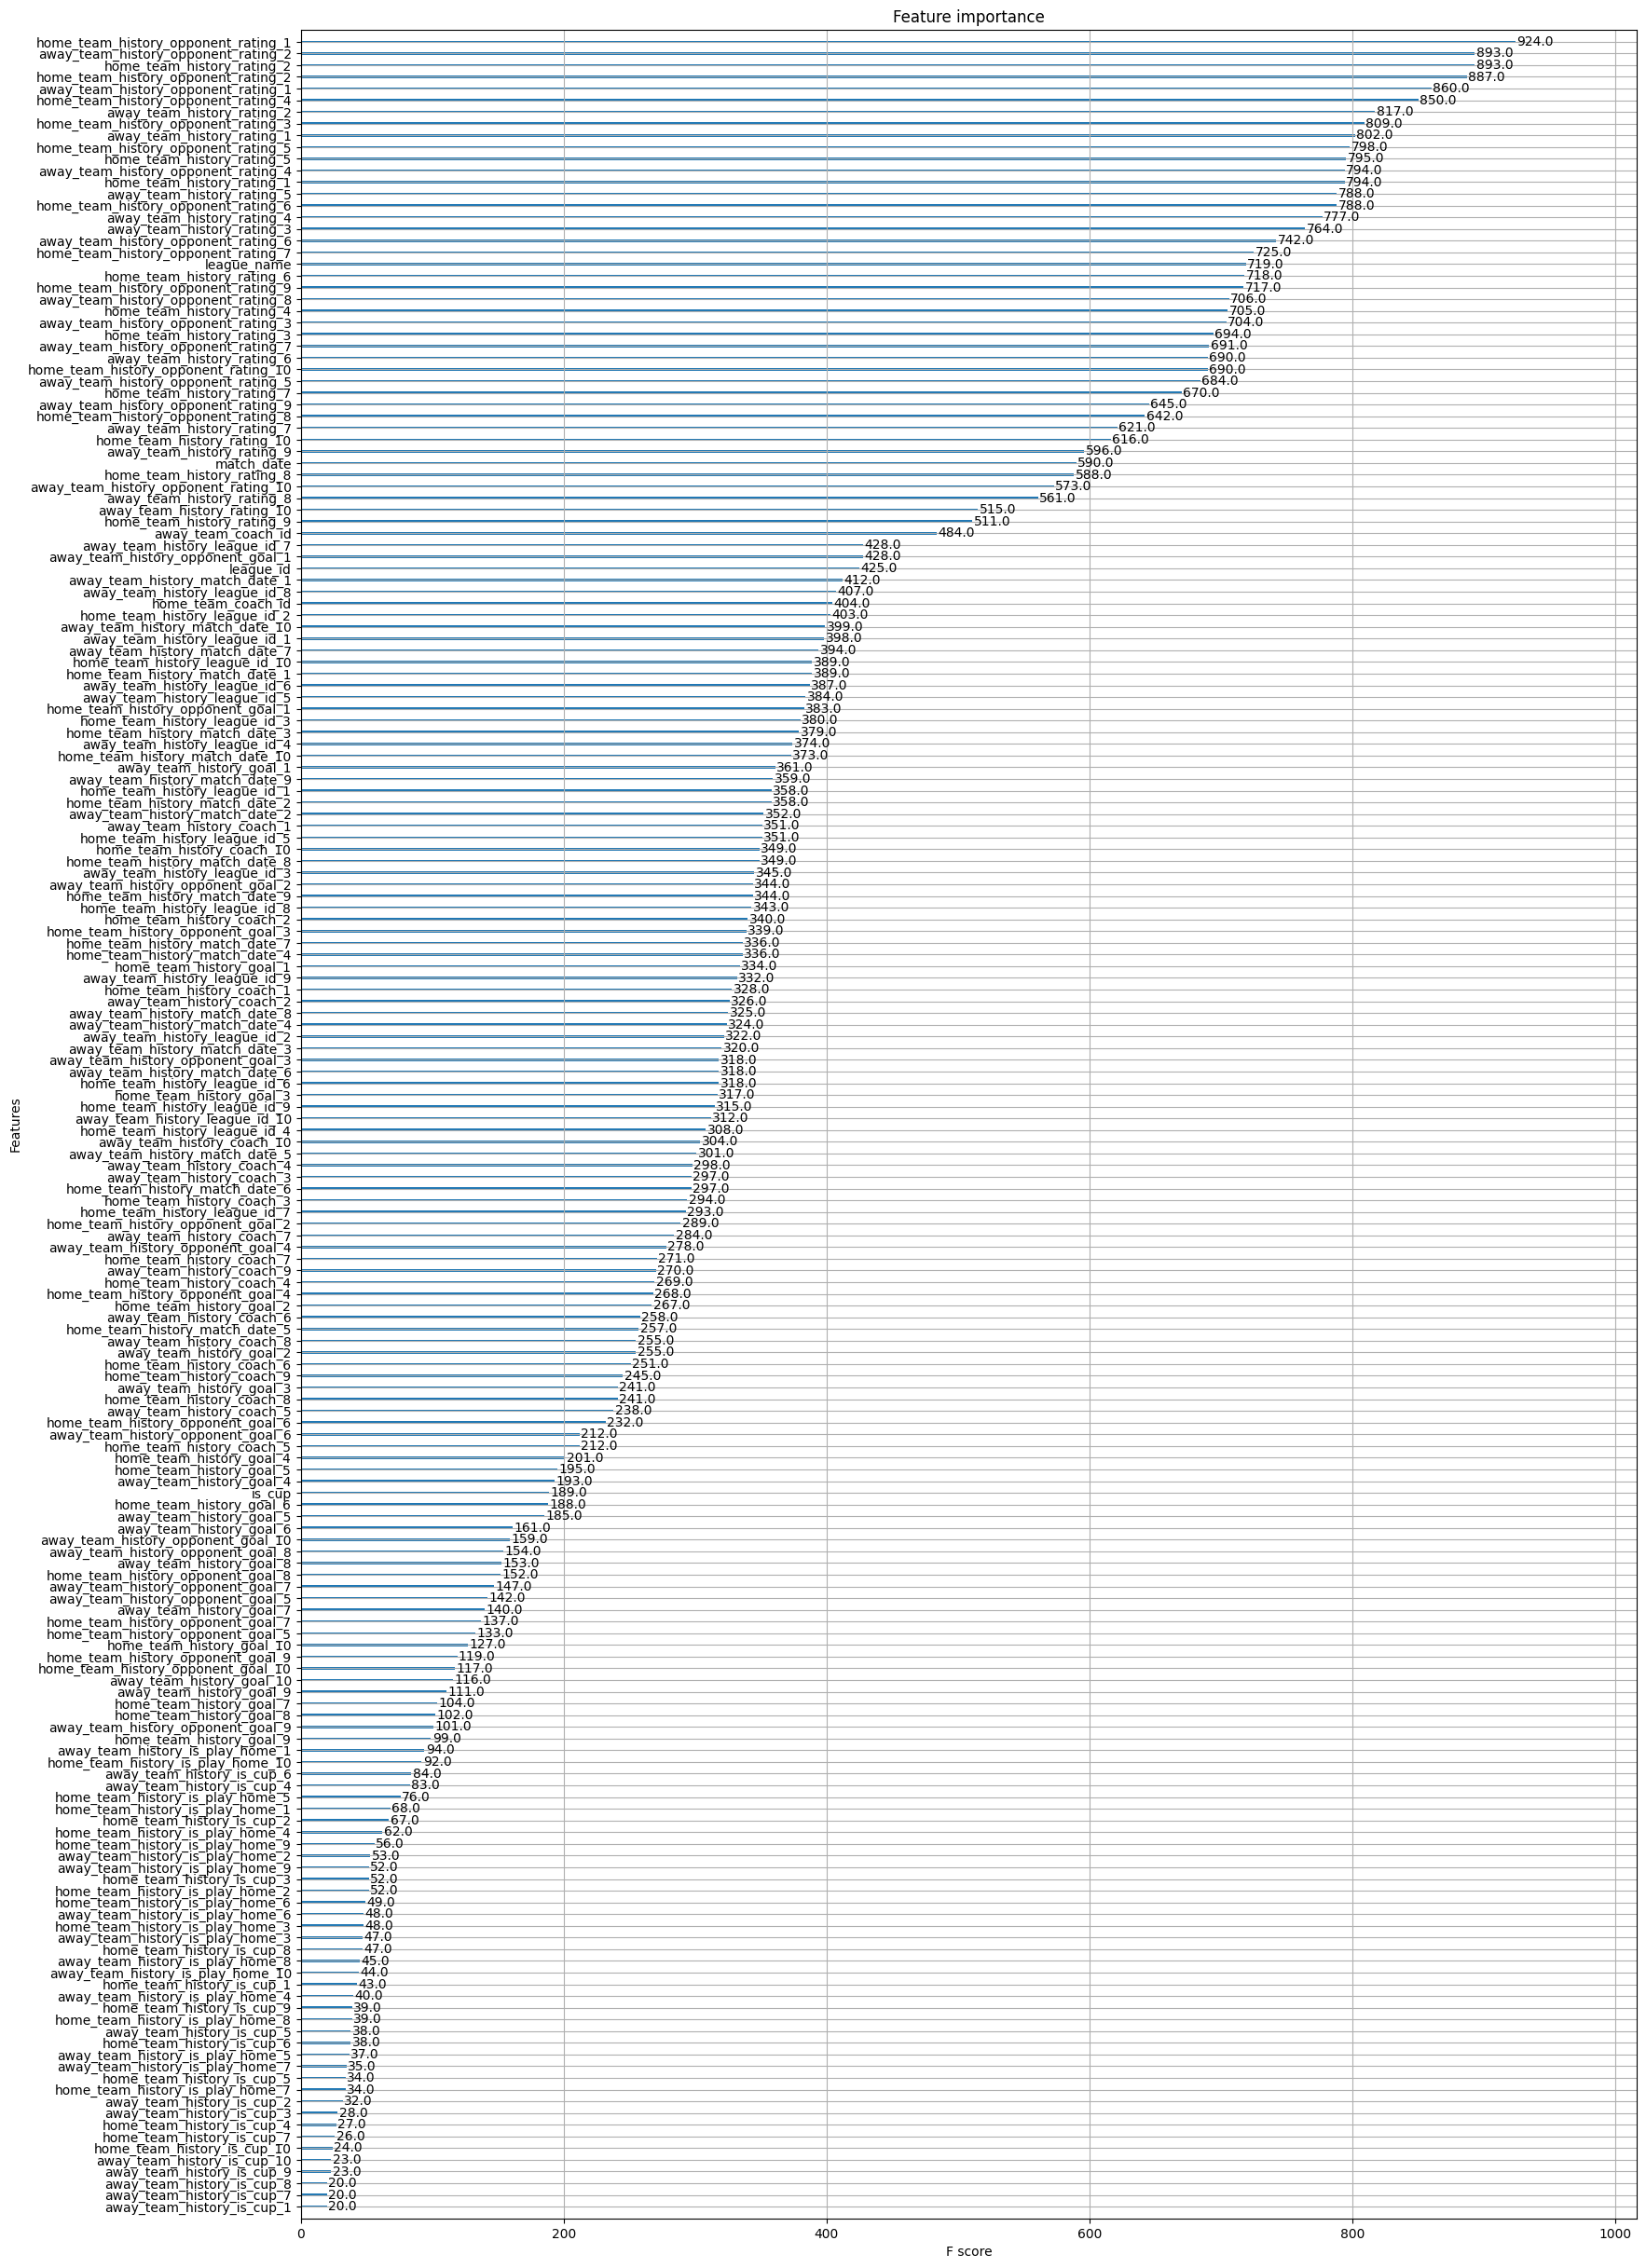

In [59]:
xgb.plot_importance(bst, max_num_features=200)
fig = plt.gcf()
fig.set_size_inches(18.5, 30.5)

In [60]:
xgb.plot_tree(bst, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(320, 200)
fig.savefig("xgb_tree_task1.png")

In [61]:
bst.best_iteration

666

In [62]:
bst.best_score

1.0123586463199372

In [63]:
X_test_d = xgb.DMatrix(X_test)

In [64]:
predictions = bst.predict(X_test_d, iteration_range=(0, bst.best_iteration))

In [77]:
output_ = pd.DataFrame(np.round(predictions,decimals=2) ,columns=["Home","Draw","Away"])
output_to_csv = pd.concat([df_test['id'], output_],axis=1).to_csv("./Task1_XGBoost_submission.csv")
output_to_csv

<h2>I continue Task 1 for another Data preprocess method at "Task1-2.ipynb"</h2>